In [1]:
import numpy as np
import sympy
import matplotlib.pyplot as plt

In [2]:
def draw(M=(-2000,1500),
         r=15000,
         G=(8000,1500)):
    
    theta = np.linspace(0, 2*np.pi, 100)
    theta10 = np.linspace(0, 2*np.pi, 10)
    
    # Circle
    x_c = M[0] + r * np.cos(theta)
    y_c = M[1] + r * np.sin(theta)
    
    # Ellipse
    
    # Eccentricity and axes
    e = (G[0] - M[0])/r
    a = r/2
    b = ((r/2) ** 2 - ((G[0] - M[0])/2) ** 2) ** .5
    
    # Radius
    r_e = a*(1-e**2)/(1-e*np.cos(theta))
    
    x_e = M[0] + r_e * np.cos(theta)
    y_e = M[1] + r_e * np.sin(theta)
    
    # Alternatively
    x_e = (M[0] + G[0])/2 + a * np.cos(theta)
    y_e = (M[1] + G[1])/2 + b * np.sin(theta)
    
    # Tangents
#     x_t = (M[0] + G[0])/2 + a * (np.cos(theta) - np.sin(theta))
#     y_t = (M[1] + G[1])/2 + b * (np.sin(theta) + np.cos(theta))
    
    
    
    fig, ax = plt.subplots(figsize=(10,10))
    
    plt.plot(x_c, y_c)
    plt.plot(x_e, y_e)
    
#     for x0, x1, y0, y1 in zip(x_t, x_e, y_t, y_e):
#         plt.plot([x0, x1], [y0, y1])
        
    plt.scatter(*zip(M,G))
    
    ax.set_aspect('equal', 'box')

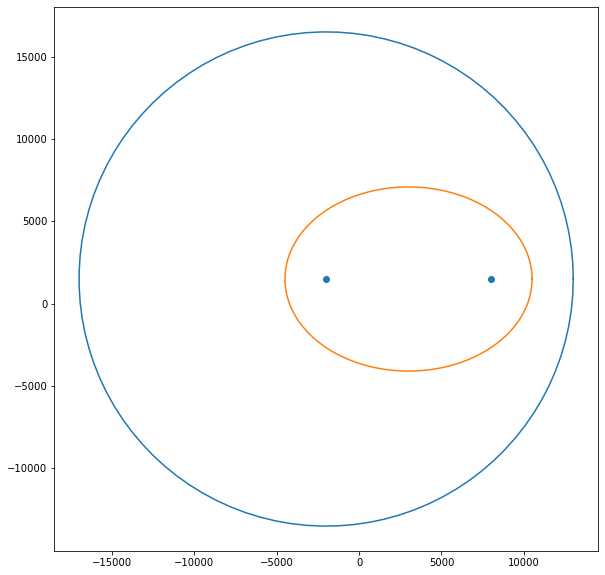

In [3]:
draw()

In [4]:
M=(-2000,1500)
r=15000
G=(8000,1500)

In [574]:
a,b,x_t,y_t,x_0,y_0,x_p,y_p,x,y,k = sympy.symbols('a b x_t y_t x_0 y_0 x_p y_p x y k')

In [575]:
# Ellipse equation
ell = (x - x_0)**2/a**2 + (y - y_0)**2/b**2 - 1 
ell

-1 + (y - y_0)**2/b**2 + (x - x_0)**2/a**2

In [577]:
x_ell = sympy.solve(ell.subs(values),x)
x_ell


[3000.0 - 7224.95674727538*sqrt(-3.44827586206897e-8*y**2 + 0.000103448275862069*y + 1),
 7224.95674727538*sqrt(-3.44827586206897e-8*y**2 + 0.000103448275862069*y + 1) + 3000.0]

In [94]:
# Line equation
line = {y:k*(x-x_p) + y_p}

In [106]:
# Values for num app
values = {x_0:(M[0] + G[0])/2,
        y_0:(M[1] + G[1])/2,
        a:r/2,
        b:((r/2) ** 2 - ((G[0] - M[0])/2) ** 2) ** .5}

In [115]:
# Polynomial in x to solve for tangent points
eq = sympy.Poly(ell.subs(line),x)

In [121]:
# Coefficients
A,B,C = eq.coeffs()

In [126]:
# Determinant
D = B**2 - 4*A*C

In [127]:
# Solve for k (if det is zero, there is only one solution, the tangential point)
sols_k = sympy.solve(D,k)

In [128]:
sols_k

[(-x_0*y_0 + x_0*y_p + x_p*y_0 - x_p*y_p - sqrt(-a**2*b**2 + a**2*y_0**2 - 2*a**2*y_0*y_p + a**2*y_p**2 + b**2*x_0**2 - 2*b**2*x_0*x_p + b**2*x_p**2))/(a**2 - x_0**2 + 2*x_0*x_p - x_p**2),
 (-x_0*y_0 + x_0*y_p + x_p*y_0 - x_p*y_p + sqrt(-a**2*b**2 + a**2*y_0**2 - 2*a**2*y_0*y_p + a**2*y_p**2 + b**2*x_0**2 - 2*b**2*x_0*x_p + b**2*x_p**2))/(a**2 - x_0**2 + 2*x_0*x_p - x_p**2)]

In [144]:
sols_x = [sympy.solve(eq.subs({k:sol_k}),x) for sol_k in sols_k]

OK it seems to work. Now we will use the formula for the angle between two slopes m1 and m2. The condition $\widehat{RPS} > 45°$ is identical to $\tan(\theta) > 1$

$$\tan(\theta) = \frac{m1−m2}{1+m1.m2}$$

In [ ]:
m1, m2 = sols_k
tan_theta = (m1 - m2)/(1+m1*m2)

# Find the exact solutions for equality
sols_P = sympy.solve(sympy.simplify(tan_theta-1), (x_p, y_p))

In [215]:
sols_P

[(x_0 - sqrt(a**2 + 3*b**2 - y_0**2 + 2*y_0*y_p - y_p**2 - 2*sqrt(a**2*y_0**2 - 2*a**2*y_0*y_p + a**2*y_p**2 + 2*b**4 - b**2*y_0**2 + 2*b**2*y_0*y_p - b**2*y_p**2)),
  y_p),
 (x_0 + sqrt(a**2 + 3*b**2 - y_0**2 + 2*y_0*y_p - y_p**2 - 2*sqrt(a**2*y_0**2 - 2*a**2*y_0*y_p + a**2*y_p**2 + 2*b**4 - b**2*y_0**2 + 2*b**2*y_0*y_p - b**2*y_p**2)),
  y_p),
 (x_0 - sqrt(a**2 + 3*b**2 - y_0**2 + 2*y_0*y_p - y_p**2 + 2*sqrt(a**2*y_0**2 - 2*a**2*y_0*y_p + a**2*y_p**2 + 2*b**4 - b**2*y_0**2 + 2*b**2*y_0*y_p - b**2*y_p**2)),
  y_p),
 (x_0 + sqrt(a**2 + 3*b**2 - y_0**2 + 2*y_0*y_p - y_p**2 + 2*sqrt(a**2*y_0**2 - 2*a**2*y_0*y_p + a**2*y_p**2 + 2*b**4 - b**2*y_0**2 + 2*b**2*y_0*y_p - b**2*y_p**2)),
  y_p)]

1.00002008039543 True


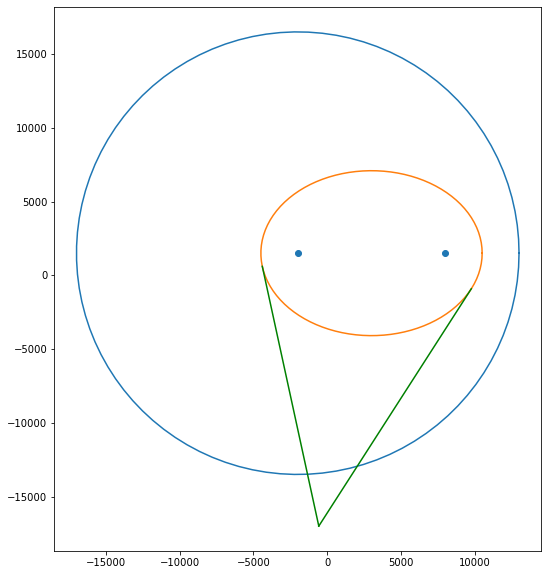

In [559]:
P = {x_p:18407,y_p:0}
P = {x_p:-574,y_p:-17000}
x_t_list = [sol_x[0].subs(values).subs(P) for sol_x in sols_x]
y_t_list = [(y_0 - b * sympy.sqrt(1 - (x_t_list[0] - x_0) ** 2/a**2)).subs(values),
            (y_0 - b * sympy.sqrt(1 - (x_t_list[1] - x_0) ** 2/a**2)).subs(values)]

draw()
plt.plot([P[x_p],x_t_list[0]], [P[y_p],y_t_list[0]], color='g')
plt.plot([P[x_p],x_t_list[1]], [P[y_p],y_t_list[1]], color='g')

result=tan_theta.subs(values).subs(P)
print(result, result>1)

<lambdifygenerated-61>:2: RuntimeWarning: invalid value encountered in sqrt
  return 3000.0 - 12155.2457811432*sqrt(-6.76818950930626e-9*y_p**2 + 2.03045685279188e-5*y_p - 0.606782439155367*sqrt(1.24416796267496e-8*y_p**2 - 3.73250388802488e-5*y_p + 1) + 1)
<lambdifygenerated-62>:2: RuntimeWarning: invalid value encountered in sqrt
  return 12155.2457811432*sqrt(-6.76818950930626e-9*y_p**2 + 2.03045685279188e-5*y_p - 0.606782439155367*sqrt(1.24416796267496e-8*y_p**2 - 3.73250388802488e-5*y_p + 1) + 1) + 3000.0
<lambdifygenerated-63>:2: RuntimeWarning: invalid value encountered in sqrt
  return 3000.0 - 12155.2457811432*sqrt(-6.76818950930626e-9*y_p**2 + 2.03045685279188e-5*y_p + 0.606782439155367*sqrt(1.24416796267496e-8*y_p**2 - 3.73250388802488e-5*y_p + 1) + 1)
<lambdifygenerated-64>:2: RuntimeWarning: invalid value encountered in sqrt
  return 12155.2457811432*sqrt(-6.76818950930626e-9*y_p**2 + 2.03045685279188e-5*y_p + 0.606782439155367*sqrt(1.24416796267496e-8*y_p**2 - 3.732503888

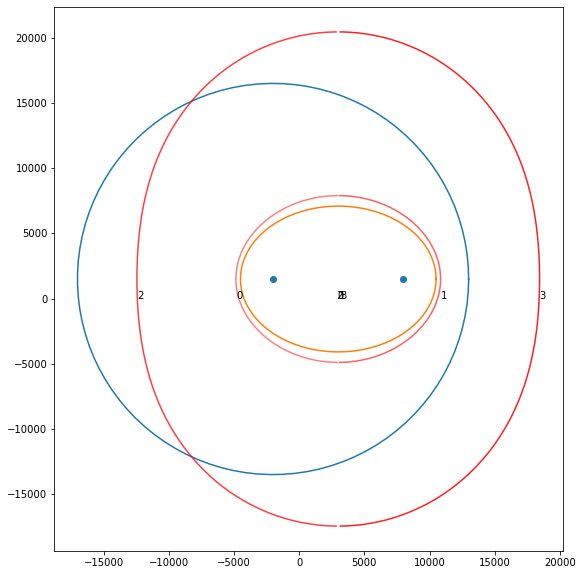

In [333]:
y_p_list = np.arange(-20000,25000)
draw()
sols_P_calc = [sympy.lambdify(expr=sol_P[0].subs(values),args=y_p) for sol_P in sols_P]

for i,sol_P in enumerate(sols_P_calc):
    
    x_p_list = sol_P(y_p_list)
#     points = [(vx,vy) for vx,vy in zip(x_p_list,y_p_list) if vx.is_real]
#     points = list(zip(*points))
    plt.plot(x_p_list,y_p_list, color='r', alpha=.5+.5*i/4)
    plt.text(np.nanmin(x_p_list),0,i)
    plt.text(np.nanmax(x_p_list),0,i)

To count points we can sweep all y values from ~-20000 to ~22000 and count how many integer values of x are between curve 2 and 0, and 1 and 3. 

In [578]:
sols_P_calc = [sympy.lambdify(expr=sol_P[0].subs(values),args=y_p) for sol_P in sols_P]
x_calc = [sympy.lambdify(expr=x_e.subs(values),args=y) for x_e in x_ell]

y_p_list = np.arange(-18000, 20500)
x_p_list = np.arange(-12500, 18500)

In [582]:
# External boundaries (ceiling for the left, floor for the right)
x_ext_left = np.ceil(sols_P_calc[2](y_p_list))
x_ext_right = np.floor(sols_P_calc[3](y_p_list))

# Internal boundaries to remove (ceiling for the left, floor for the right)
# IT'S THE ELLIPSE
x_int_left = np.ceil(x_calc[0](y_p_list))
x_int_right = np.floor(x_calc[1](y_p_list))

x_int_lim = [np.nanmin(x_int_left),np.nanmax(x_int_right)]
x_ext_lim = [np.nanmin(x_ext_left),np.nanmax(x_ext_right)]
y_int_lim = y_p_list[x_int_left==np.nanmax(x_int_left)]
y_ext_lim = y_p_list[x_ext_left==np.nanmax(x_ext_left)]

In [585]:
np.nansum(x_ext_right-x_ext_left+1 - np.nan_to_num(x_int_right-x_int_left+1))

810834388.0

This should be the answer.

## Annex
Older stuff

In [129]:
# Slope of tangent at (x_t, y_t)
A = - (x_t - x_0)/(y_t - y_0) * b**2/a**2

In [132]:
# Intercept of tangent at (x, y)
B = - sols_k[0] * x + y
B

-x*(-x_0*y_0 + x_0*y_p + x_p*y_0 - x_p*y_p - sqrt(-a**2*b**2 + a**2*y_0**2 - 2*a**2*y_0*y_p + a**2*y_p**2 + b**2*x_0**2 - 2*b**2*x_0*x_p + b**2*x_p**2))/(a**2 - x_0**2 + 2*x_0*x_p - x_p**2) + y

In [133]:
B.subs(values).subs()

-x*(-x_p*y_p + 1500.0*x_p + 3000.0*y_p - 36742346.1417477*sqrt(2.31481481481481e-8*x_p**2 - 0.000138888888888889*x_p + 4.16666666666667e-8*y_p**2 - 0.000125*y_p - 1) - 4500000.0)/(-x_p**2 + 6000.0*x_p + 47250000.0) + y

In [82]:
points = [[(j,(A*x+B).subs(values).subs({x_t:i,x:j})) for j in np.linspace(-15000,15000,2)] for i in np.linspace(-2000,10000,13) ]
points = [list(zip(*point)) for point in points]

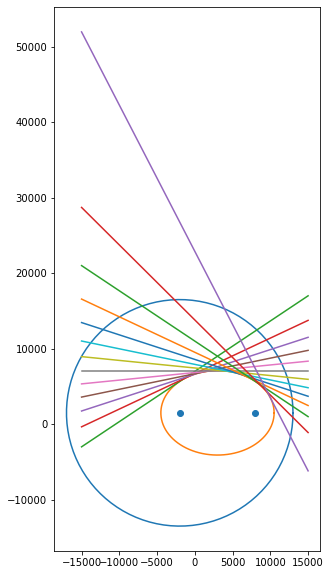

In [83]:
draw()
for point in points:
    plt.plot(*point)

In [84]:
h = sympy.sqrt(1 - (x_t - x_0) ** 2/a**2)
h

sqrt(1 - (-x_0 + x_t)**2/a**2)

In [85]:
A*x+B-y

b*sqrt(1 - (-x_0 + x_t)**2/a**2) - y + y_0 + b*x*(x_0 - x_t)/(a**2*sqrt(1 - (-x_0 + x_t)**2/a**2)) - b*x_t*(x_0 - x_t)/(a**2*sqrt(1 - (-x_0 + x_t)**2/a**2))

In [86]:
sols = sympy.solve((A*x+B-y),(x_t,y_t),simplify=False,rational=False)

KeyboardInterrupt: 

In [ ]:
ell = {y_t:y_0 + b * sympy.sqrt(1 - (x_t - x_0) ** 2/a**2)}

In [ ]:
[sol.subs(ell) for sol in sols[0]]

In [76]:
sympy.simplify(sols[0][0].subs(ell))

(b*x + b*x_0 - sqrt(b*(-4*a**2*b + 4*a**2*y*sqrt((a**2 - x_0**2 + 2*x_0*x_t - x_t**2)/a**2) - 4*a**2*y_0*sqrt((a**2 - x_0**2 + 2*x_0*x_t - x_t**2)/a**2) + b*x**2 - 2*b*x*x_0 + 5*b*x_0**2 - 8*b*x_0*x_t + 4*b*x_t**2)))/(2*b)

In [73]:
sympy.solve(sols[0][0].subs(ell)-x_t,x_t)

KeyboardInterrupt: 